In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Data csv파일 받아오기

In [4]:
P200_df = pd.read_csv('P200.csv')
P200_df.head()

,subject,trial,condition,group,gender,age,education,Fz_P200,FCz_P200,Cz_P200,FC3_P200,FC4_P200,C3_P200,C4_P200,CP3_P200,CP4_P200
0,1,1,1,0,M,44,16.0,-4.281366,-6.658456,-14.511602,0.534968,-10.151251,1.568010,-15.546915,-2.668376,-13.597885
1,1,2,1,0,M,44,16.0,6.607412,9.957393,9.541910,7.680902,8.607368,1.568734,10.505954,2.997705,6.923490
2,1,3,1,0,M,44,16.0,11.485566,13.757878,18.368876,12.485129,13.987434,14.659761,13.410249,18.663222,16.110812
3,1,4,1,0,M,44,16.0,11.772395,13.603622,17.705315,12.595341,8.055663,14.441024,13.026871,17.386539,15.207634
4,1,5,1,0,M,44,16.0,3.829656,2.245854,3.302861,8.796280,5.865524,6.957683,5.901222,3.791339,2.497285


<칼럼명 해석>

1. Subject: 1~81명의 피험자 (49명의 환자, 32명의 건강인)

2. Trial: 한 실험 조건 당 100번의 반복 실험

3. Condition: 실험 조건

     (1) pressed a button to immediately generated a tone

     (2) passively listened to the same tone

     (3) pressed a button without generating a tone

4. Group: 1- patient / 0- Healthy

5. Gender: Male / Female

6. Age: 나이, Education: 12- highschool / 16- college or university

7. Channel: Fz, FCz, Cz: center channel / FC3, C3, CP3: left channel / FC4, C4, CP4: right channel

In [8]:
P200_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23986 entries, 0 to 23985
Data columns (total 16 columns):
subject      23986 non-null int64
trial        23986 non-null int64
condition    23986 non-null int64
group        23986 non-null int64
gender       23986 non-null object
age          23986 non-null int64
education    23986 non-null float64
Fz_P200      23201 non-null float64
FCz_P200     23201 non-null float64
Cz_P200      23201 non-null float64
FC3_P200     23201 non-null float64
FC4_P200     23201 non-null float64
C3_P200      23201 non-null float64
C4_P200      23201 non-null float64
CP3_P200     23201 non-null float64
CP4_P200     23201 non-null float64
dtypes: float64(10), int64(5), object(1)
memory usage: 2.9+ MB


<나이 별 사람 수>

In [9]:
P200_age = P200_df.age.value_counts()
print(P200_age)

23    1788
53    1193
22    1192
60    1192
56    1190
24    1190
25    1188
44     894
26     893
49     893
32     893
45     893
47     890
41     597
63     596
27     596
28     596
46     595
29     595
61     595
37     547
33     516
54     299
48     298
21     298
38     298
30     298
43     298
39     298
40     298
57     298
52     297
51     297
19     297
31     297
59     297
50     296
Name: age, dtype: int64


<학력 별 사람 수>

In [10]:
P200_education = P200_df.education.value_counts()
print(P200_education)

16.0    7363
13.0    4171
12.0    3224
14.0    2383
15.0    1487
18.0    1190
17.0    1190
9.0      893
19.0     893
11.5     298
13.5     298
11.0     298
12.5     298
Name: education, dtype: int64


<성별 사람 수>

In [11]:
P200_gender = P200_df.gender.value_counts()
print(P200_gender)

 M    19820
 F     4166
Name: gender, dtype: int64


-> 문자열을 숫자로 치환

In [12]:
P200_df['gender']=P200_df['gender'].replace([' M',' F'],[0,1])

->환자와 건강인 막대그래프

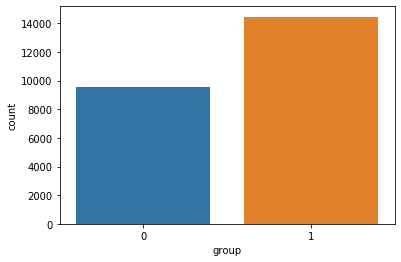

In [13]:
sns.countplot('group', data=P200_df)

-> 조현병과 성별, 나이, 교육 수준의 상관관계 표시도

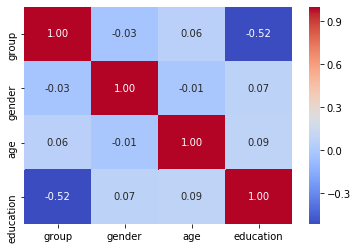

In [14]:
sns.heatmap(
    P200_df[["group","gender","age","education"]].corr(),
    annot=True,
    fmt=".2f",
    cmap="coolwarm"
)

-> 데이터에서 null값(이상값) 분석

In [17]:
P200_df.isnull().sum()

subject        0
trial          0
condition      0
group          0
gender         0
age            0
education      0
Fz_P200      785
FCz_P200     785
Cz_P200      785
FC3_P200     785
FC4_P200     785
C3_P200      785
C4_P200      785
CP3_P200     785
CP4_P200     785
dtype: int64

-> 전체 데이터에서 결측값 퍼센티지

In [18]:
P200_df['Fz_P200'].isnull().sum() / len(P200_df['Fz_P200'])*100

3.272742433085967

-> 결측값 제거

In [19]:
P200_df = P200_df.dropna(how='any', axis=0)

-> 결측값 제거 후 결과

In [20]:
P200_df.isnull().sum()

subject      0
trial        0
condition    0
group        0
gender       0
age          0
education    0
Fz_P200      0
FCz_P200     0
Cz_P200      0
FC3_P200     0
FC4_P200     0
C3_P200      0
C4_P200      0
CP3_P200     0
CP4_P200     0
dtype: int64

->결측값 제거 후 재분석한 그래프

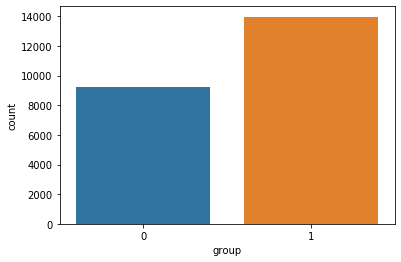

In [21]:
sns.countplot('group', data=P200_df)

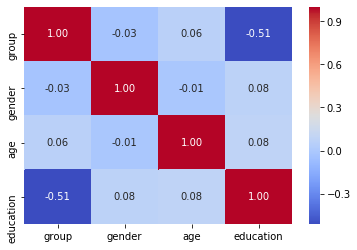

In [22]:
sns.heatmap(
    P200_df[["group","gender","age","education"]].corr(),
    annot=True,
    fmt=".2f",
    cmap="coolwarm"
)

-> 바이올린형 그래프로 본 성별-조현병, 나이-조현병의 상관관계

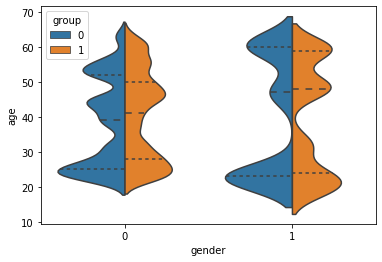

In [23]:
sns.violinplot('gender', 'age', hue='group', data=P200_df, split=True, inner="quartile")

-> 바이올린형 그래프로 본 성별-조현병과 학력-조현병의 상관관계

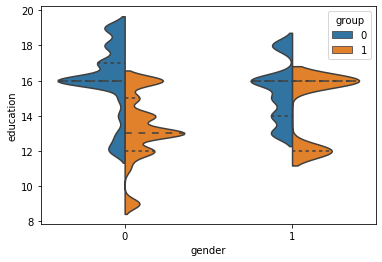

In [24]:
sns.violinplot('gender', 'education', hue='group', data=P200_df, split=True, inner="quartile")

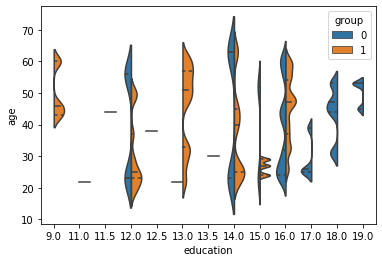

In [25]:
##이 그래프는 필요 없을 것 같음..
sns.violinplot('education','age', hue='group', data=P200_df, split=True, inner="quartile")

-> 나이와 학력에 따른 조현병 환자 및 건강인의 분포도

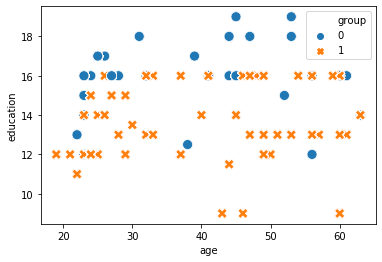

In [26]:
sns.scatterplot(x='age', y='education', hue='group', style='group', s=100, data=P200_df)
plt.show()

In [40]:
from pprint import pprint
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc

-> 데이터 분리: X-age, gender, education, channels / Y-group(조현병, 건강인)

In [41]:
col_names = P200_df.columns.values
X = P200_df[col_names[4:]]
Y = P200_df[col_names[3]]

In [42]:
X.head(5)

,gender,age,education,Fz_P200,FCz_P200,Cz_P200,FC3_P200,FC4_P200,C3_P200,C4_P200,CP3_P200,CP4_P200
0,0,44,16.0,-4.281366,-6.658456,-14.511602,0.534968,-10.151251,1.568010,-15.546915,-2.668376,-13.597885
1,0,44,16.0,6.607412,9.957393,9.541910,7.680902,8.607368,1.568734,10.505954,2.997705,6.923490
2,0,44,16.0,11.485566,13.757878,18.368876,12.485129,13.987434,14.659761,13.410249,18.663222,16.110812
3,0,44,16.0,11.772395,13.603622,17.705315,12.595341,8.055663,14.441024,13.026871,17.386539,15.207634
4,0,44,16.0,3.829656,2.245854,3.302861,8.796280,5.865524,6.957683,5.901222,3.791339,2.497285


In [43]:
Y.head(5)

0    0
1    0
2    0
3    0
4    0
Name: group, dtype: int64

->train, validation, test data set 분리

In [44]:
def train_val_test_split(X, Y, val_size=0.3, test_size=0.2, random_state=123):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, 
                                                        test_size=test_size, 
                                                        random_state=random_state)
    val_size_rev = val_size / (1 - test_size)
    X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train,
                                                      test_size=val_size_rev,
                                                      random_state=random_state)
    return X_train, X_val, X_test, Y_train, Y_val, Y_test

In [45]:
X_train, X_val, X_test, Y_train, Y_val, Y_test = train_val_test_split(X, Y,
                                                                      val_size=0.3,
                                                                      test_size=0.2,
                                                                      random_state=123)

In [46]:
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

(11600, 12)
(6960, 12)
(4641, 12)


-> Logistic Regression을 위한 다양한 가중치

In [47]:
penalty_set = ['l1', 'l2']
C_set = [0.1, 1, 10, 1e2, 1e3, 1e4, 1e5, 1e6]

In [48]:
result = []
for penalty in penalty_set:
    for C in C_set:
        model = LogisticRegression(penalty=penalty, C=C, class_weight='balanced')
        model = model.fit(X_train, Y_train)
#         Y_val_score = model.decision_function(X_val)
        Y_val_score = model.predict_proba(X_val)[:, 1]
        fpr, tpr, _ = roc_curve(Y_val, Y_val_score)
        result.append((model, penalty, C, auc(fpr, tpr)))

C:\Python\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Python\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Python\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Python\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Python\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Python\lib\site-packages\sklearn\linear_mo

In [49]:
result

[(LogisticRegression(C=0.1, class_weight='balanced', dual=False,
                     fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                     max_iter=100, multi_class='warn', n_jobs=None, penalty='l1',
                     random_state=None, solver='warn', tol=0.0001, verbose=0,
                     warm_start=False), 'l1', 0.1, 0.8175943328567289),
 (LogisticRegression(C=1, class_weight='balanced', dual=False, fit_intercept=True,
                     intercept_scaling=1, l1_ratio=None, max_iter=100,
                     multi_class='warn', n_jobs=None, penalty='l1',
                     random_state=None, solver='warn', tol=0.0001, verbose=0,
                     warm_start=False),
  'l1',
  1,
  0.8175498474891882),
 (LogisticRegression(C=10, class_weight='balanced', dual=False,
                     fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                     max_iter=100, multi_class='warn', n_jobs=None, penalty='l1',
                     random

-> 회귀 분석 결과를 정렬 후, 최상의 정확도를 갖는 모델 찾기

In [50]:
logreg_result = sorted(result, key=lambda x: x[3], reverse=True)

In [51]:
logreg_result

[(LogisticRegression(C=0.1, class_weight='balanced', dual=False,
                     fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                     max_iter=100, multi_class='warn', n_jobs=None, penalty='l1',
                     random_state=None, solver='warn', tol=0.0001, verbose=0,
                     warm_start=False), 'l1', 0.1, 0.8175943328567289),
 (LogisticRegression(C=1, class_weight='balanced', dual=False, fit_intercept=True,
                     intercept_scaling=1, l1_ratio=None, max_iter=100,
                     multi_class='warn', n_jobs=None, penalty='l2',
                     random_state=None, solver='warn', tol=0.0001, verbose=0,
                     warm_start=False),
  'l2',
  1,
  0.8175851260205069),
 (LogisticRegression(C=1, class_weight='balanced', dual=False, fit_intercept=True,
                     intercept_scaling=1, l1_ratio=None, max_iter=100,
                     multi_class='warn', n_jobs=None, penalty='l1',
                     random_

In [52]:
best_logreg_result = logreg_result[0]
print(best_logreg_result)

(LogisticRegression(C=0.1, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='warn', n_jobs=None, penalty='l1',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False), 'l1', 0.1, 0.8175943328567289)
